In [6]:
import pandas as pd
from collections import Counter
import re

file_path = 'white-wine-price-rating.csv'
wine_data = pd.read_csv(file_path)

high_rating_wines = wine_data[(wine_data['WineRating'] >= 4.6) & (wine_data['WineRating'] <= 5.0)]

full_names = high_rating_wines['FullName']

def tokenize(name):
    # Convert to lowercase and remove non-alphabetic characters
    tokens = re.findall(r'\b[a-z]+\b', name.lower())
    return tokens

all_words = [word for name in full_names for word in tokenize(name)]

word_counts = Counter(all_words)

most_common_words = word_counts.most_common(10) 

most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

display(most_common_words_df)

,Word,Frequency
0,domaine,54
1,montrachet,42
2,cru,42
3,grand,41
4,coche,26
5,dury,26
6,de,20
7,les,19
8,la,13
9,conti,13


In [4]:
pip install wordcloud
#to install this library

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


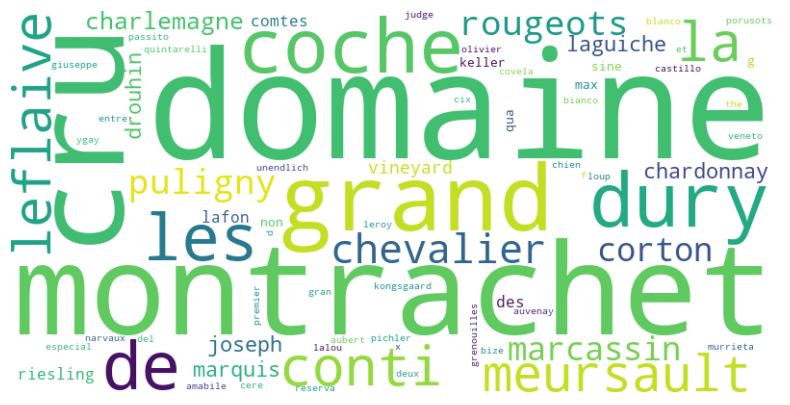

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()